# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

filename_features = "./uci-har-dataset/features.txt"
filename_labels = "./uci-har-dataset/activity_labels.txt"

filename_subtrain = "./uci-har-dataset/train/subject_train.txt"
filename_xtrain = "./uci-har-dataset/train/X_train.txt"
filename_ytrain = "./uci-har-dataset/train/y_train.txt"

filename_subtest = "./uci-har-dataset/test/subject_test.txt"
ffilename_xtest = "./uci-har-dataset/test/X_test.txt"
filename_ytest = "./uci-har-dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\Joao Narciso Santos\AppData\Local\Temp\ipykernel_13632\2752522802.py:24: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\Joao Narciso Santos\AppData\Local\Temp\ipykernel_13632\2752522802.py:27: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
C:\Users\Joao Narciso Santos\AppData\Local\Temp\ipykernel_13632\2752522802.py:31: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [16]:
%%time
clf = DecisionTreeClassifier(random_state=1234, ccp_alpha=0.001).fit(X_train, y_train)

CPU times: total: 5.77 s
Wall time: 7.09 s


In [17]:
print(X_train.shape)
print(y_train.shape)

(7352, 561)
(7352, 1)


In [18]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9757889009793254
0.8795385137427892


## Árvore com PCA

Faça uma análise de componentes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [19]:
%%time
prcomp = PCA().fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste = prcomp.transform(X_test)

print(pc_treino.shape)
print(pc_teste.shape)

(7352, 561)
(2947, 561)
CPU times: total: 2.39 s
Wall time: 1.23 s


In [20]:
n = 1

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:, :n], columns=colunas)
pc_test = pd.DataFrame(pc_teste[:, :n], columns=colunas)

pc_train.head()

,cp1
0,-5.520280
1,-5.535350
2,-5.474988
3,-5.677232
4,-5.748749


In [21]:
%%time
clf_pca = DecisionTreeClassifier(random_state=1234, ccp_alpha=0.001).fit(pc_train, y_train)

CPU times: total: 78.1 ms
Wall time: 79.8 ms


In [22]:
print(clf_pca.score(pc_train, y_train))
print(clf_pca.score(pc_test, y_test))

0.499727965179543
0.45707499151679676


- A acurácia e o tempo de processamento cairam comparado com o primeiro item.

## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


In [23]:
%%time
prcomp = PCA().fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste = prcomp.transform(X_test)

CPU times: total: 2.56 s
Wall time: 2.43 s


In [24]:
%%time

lista = [1, 2, 5, 10, 50]
score_train = []
score_test = []

for n in lista:
    colunas = ['cp'+str(x+1) for x in list(range(n))]

    pc_train = pd.DataFrame(pc_treino[:, :n], columns=colunas)
    pc_test = pd.DataFrame(pc_teste[:, :n], columns=colunas)

    clf = DecisionTreeClassifier(random_state=100, ccp_alpha=0.001).fit(pc_train, y_train)

    s_tr = clf.score(pc_train, y_train)
    score_train.append(s_tr)

    s_te = clf.score(pc_test, y_test)
    score_test.append(s_te)

CPU times: total: 953 ms
Wall time: 1.3 s


In [25]:
resultados = {'quantidade_componentes': lista, 'score_treino': score_train, 'score_teste': score_test}

df = pd.DataFrame(resultados)
df

,quantidade_componentes,score_treino,score_teste
0,1,0.499728,0.457075
1,2,0.612758,0.584662
2,5,0.846028,0.788938
3,10,0.892682,0.823889
4,50,0.919342,0.823210


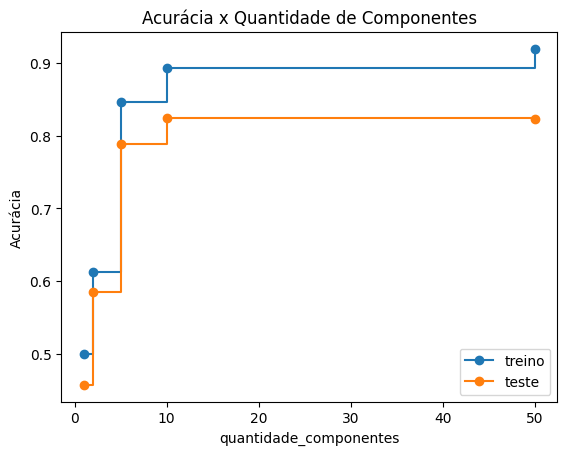

In [26]:
fig, ax = plt.subplots()

ax.set_xlabel("quantidade_componentes")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x Quantidade de Componentes")
ax.plot(df['quantidade_componentes'], df['score_treino'], marker='o', label="treino", drawstyle="steps-post")
ax.plot(df['quantidade_componentes'], df['score_teste'], marker='o', label="teste", drawstyle="steps-post")

ax.legend()
plt.show()


In [27]:
%%time

n = 10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:, :n], columns=colunas)
pc_test = pd.DataFrame(pc_teste[:, :n], columns=colunas)

clf = DecisionTreeClassifier(random_state=1234, ccp_alpha=0.001).fit(pc_train, y_train)

CPU times: total: 125 ms
Wall time: 156 ms


## Conclua

- **O que aconteceu com a acurácia?**<br>
A acurácia aumentou até chegar em 10 componentes e ficou com valores próximos até os 50 componentes. Tanto para a base de treino quanto para a de teste. 
Devemos ponderar e saber utilizar a quantidade de componentes nas árvores para ajudar no processamento tendo em vista uma acurácia similiar com mais componentes.

- **O que aconteceu com o tempo de processamento?**<br>
O tempo de processamento diminuiu comparado com o primeiro exercício.